#### NLTK

NLTK - одна из самых первых библиотек такого рода; она огромная и содержит очень много разных инструментов, некоторые из них никак не связаны между собой (в отличие от spacy). NLTK - больше исследовательская библиотека, конструктор своего рода. Для NLTK есть учебник, написанный авторами: [NLTK book](https://www.nltk.org/book/). Для этого учебника специально существует подмодуль book, который обычно импортируется целиком:

In [ ]:
import nltk 
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


В этом модуле есть некий набор текстов и набор предложений, с которыми можно поиграться. 

Центральный объект для NLTK (по крайней мере, при работе с корпусами) - это Text (nltk.text.Text). По сути, в этом объекте содержится сам текст в виде списка токенов, но у него есть дополнительные методы. Что можно делать с объектом класса Text?

In [2]:
text1.concordance('Moby', width=100, lines=5)

Displaying 5 of 84 matches:
[ Moby Dick by Herman Melville 1851 ] ETYMOLOGY . ( Su
hat white whale must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye k
 must be the same that some call Moby Dick ." " Moby Dick ?" shouted Ahab . " Do ye know the white w
ib in a squall . Death and devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" 
 devils ! men , it is Moby Dick ye have seen -- Moby Dick -- Moby Dick !" " Captain Ahab ," said Sta


Конкорданс ищет первые n вхождений заданного слова с шириной контекста width. 

In [3]:
text1.similar('whale', num=20)

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


similar возвращает num слов, которые встречаются в похожих контекстах (дистрибутивная похожесть). 

In [4]:
text1.common_contexts(['whale', 'ship'])  # тоже можно задать параметр num

the_s the_and the_is the_in the_the the_as the_was the_which the_i
a_in the_has the_when the_had the_with the_to the_by the_so the_that
the_would the_a


common_contexts ищет те самые совпадающие контексты. 

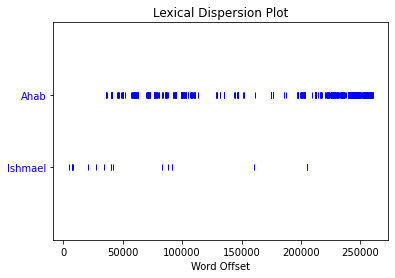

In [5]:
text1.dispersion_plot(['Ahab', 'Ishmael'])

Можно построить график распределения слов по тексту (без NumPy и matplotlib график не работает, поэтому установите эти две библиотеки, если еще не). 

In [6]:
text1.count('Moby')

84

Можно посчитать количество вхождений какого-то слова. Кстати, к текстам можно применять обычные функции len(), set() и подобные. И срезы с индексами работают!

In [7]:
text1.generate(length=100)

Building ngram index...


long , from one to the top - mast , and no coffin and went out a sea
captain -- this peaking of the whales . , so as to preserve all his
might had in former years abounding with them , they toil with their
lances , strange tales of Southern whaling . at once the bravest
Indians he was , after in vain strove to pierce the profundity . ?
then ?" a levelled flame of pale , And give no chance , watch him ;
though the line , it is to be gainsaid . have been


'long , from one to the top - mast , and no coffin and went out a sea\ncaptain -- this peaking of the whales . , so as to preserve all his\nmight had in former years abounding with them , they toil with their\nlances , strange tales of Southern whaling . at once the bravest\nIndians he was , after in vain strove to pierce the profundity . ?\nthen ?" a levelled flame of pale , And give no chance , watch him ;\nthough the line , it is to be gainsaid . have been'

Можно сгенерировать текст, "похожий" на оригинальный. Это делается с помощью n-грамов (или n-грамм, я видела разные варианты по-русски...): nltk просто в случайном порядке совмещает эти n-грамы. Как можно видеть, не слишком полезный метод, однако можно побаловаться. 

Важнее то, что в nltk есть утилиты для работы с n-грамами:

In [8]:
from nltk.util import ngrams # bigrams

list(ngrams(sent9, 3))

[('THE', 'suburb', 'of'),
 ('suburb', 'of', 'Saffron'),
 ('of', 'Saffron', 'Park'),
 ('Saffron', 'Park', 'lay'),
 ('Park', 'lay', 'on'),
 ('lay', 'on', 'the'),
 ('on', 'the', 'sunset'),
 ('the', 'sunset', 'side'),
 ('sunset', 'side', 'of'),
 ('side', 'of', 'London'),
 ('of', 'London', ','),
 ('London', ',', 'as'),
 (',', 'as', 'red'),
 ('as', 'red', 'and'),
 ('red', 'and', 'ragged'),
 ('and', 'ragged', 'as'),
 ('ragged', 'as', 'a'),
 ('as', 'a', 'cloud'),
 ('a', 'cloud', 'of'),
 ('cloud', 'of', 'sunset'),
 ('of', 'sunset', '.')]

Функция ngrams (или bigrams) возвращает список всех н-грамов списка токенов, который ей дать. N-грамы еще принимают число n. 

У класса Text есть метод, который возвращает коллокации (частотные н-грамы):

In [11]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


Как создать собственный объект класса Text? Достаточно токенизировать свой текст (любым токенизатором) и передать его в класс:

In [ ]:
mytext = Text(tokens)

Гораздо чаще на практике, однако, используются какие-то отдельные инструменты NLTK, предназначенные для обработки текста. Часть мы уже знаем: это токенизаторы и сентенайзер. 

Следующий шаг при обработке текстов - это обычно приведение слов к словарной форме. Это уже не такая простая задача, с помощью регулярок ее не решить, приходится использовать либо словари, либо более сложные методы (нейронные сети...)

Еще в прошлом веке, правда, придумали (конечно же, для английского языка) более простой способ хоть как-то унифицировать разные словоформы одного слова: стемминг. 

Стемминг – это уже чисто историческое, можно сказать, явление: в 1980-х, когда еще не было даже графического интерфейса у компьютеров и тем более средств автоматического морфоразбора, Мартин Портер разработал свой алгоритм стемминга: усечение окончания от псевдоосновы. Этот алгоритм так и называется "стеммер Портера" и доступен в версиях для нескольких европейских языков, в т.ч. для русского (Snowball – чуть более новая версия). Алгоритм с помощью правил отсекает окончания и суффиксы, основываясь на особенностях языка. Как все правиловое, работает не без ошибок.

В NLTK есть несколько стеммеров, а именно:

1. PorterStemmer
2. SnowballStemmer
3. LancasterStemmer
4. RegexpStemmer
5. RSLPStemmer

Все смотреть не будем, можете сами поискать, если интересно, нам хватит двух. 

In [1]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
example_words = ["python", "pythoner", "pythoning", "pythoned", "pythonly"]
for w in example_words:
 print(ps.stem(w))

python
python
python
python
pythonli


In [2]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('russian')  # экземпляр класса 
example = ['Пердикка', 'не', 'менее', 'десяти', 'раз', 'заключал', 'и', 'расторгал', 'союзы', 'с', 'основными', 'участниками', 'войны', '.']
for token in example:
    print(stemmer.stem(token))  # stem() - метод класса

пердикк
не
мен
десят
раз
заключа
и
расторга
союз
с
основн
участник
войн
.


Другой, более крутой способ унифицировать словоформы - все-таки приводить их к словарной форме. В NLTK есть WordNetLemmatizer, который ищет нужные леммы в словаре. Работает только для английского. 

In [3]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('increases'))
print(lemmatizer.lemmatize('playing', pos="v"))
print(lemmatizer.lemmatize('playing', pos="v")) 
print(lemmatizer.lemmatize('playing', pos="n")) 
print(lemmatizer.lemmatize('playing', pos="a")) 
print(lemmatizer.lemmatize('playing', pos="r"))
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

increase
play
play
playing
playing
playing
cat
cactus
goose
rock
python
good
best
run
run


При обработке текстов для решения задач NLP, особенно если используются классические алгоритмы машинного обучения (современные нейронки извлекают признаки из всего, им часто лучше, чтобы текст сохранялся в исходном виде), бывает нужно выкинуть слишком распространенные и малозначимые слова: союзы, предлоги и т.п. В NLTK есть списки таких слов для разных языков:

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = 'При обработке текстов для решения задач NLP, особенно если используются классические алгоритмы машинного обучения (современные нейронки извлекают признаки из всего, им часто лучше, чтобы текст сохранялся в исходном виде), бывает нужно выкинуть слишком распространенные и малозначимые слова: союзы, предлоги и т.п. В NLTK есть списки таких слов для разных языков'
stop_words = set(stopwords.words('russian'))
print('Стоп-слова:', stop_words)
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
print(filtered_sentence)

Стоп-слова: {'зачем', 'бы', 'сам', 'другой', 'есть', 'была', 'много', 'под', 'чуть', 'да', 'при', 'между', 'всегда', 'же', 'сейчас', 'ним', 'тем', 'а', 'по', 'ну', 'эти', 'с', 'было', 'от', 'ей', 'будто', 'один', 'тебя', 'этом', 'какая', 'и', 'через', 'чтоб', 'три', 'вдруг', 'к', 'тот', 'совсем', 'был', 'разве', 'него', 'для', 'хорошо', 'они', 'вас', 'том', 'потому', 'над', 'нельзя', 'быть', 'этот', 'со', 'себе', 'опять', 'всего', 'мне', 'какой', 'ее', 'ничего', 'перед', 'где', 'на', 'когда', 'более', 'меня', 'без', 'о', 'кто', 'мы', 'нас', 'может', 'куда', 'ему', 'эту', 'моя', 'что', 'за', 'лучше', 'чтобы', 'можно', 'им', 'ж', 'во', 'его', 'того', 'этой', 'конечно', 'такой', 'чего', 'них', 'наконец', 'в', 'уж', 'здесь', 'иногда', 'ней', 'вы', 'два', 'еще', 'там', 'после', 'нибудь', 'не', 'из', 'нет', 'ли', 'если', 'никогда', 'этого', 'больше', 'были', 'теперь', 'про', 'до', 'почти', 'раз', 'я', 'так', 'но', 'ни', 'тогда', 'или', 'себя', 'все', 'мой', 'она', 'ведь', 'вот', 'только', 'х

Наконец к морфологии. Подробнее о ней мы поговорим в следующие разы, потому что морфологический разбор (с частями речи и еще и грамматическими характеристиками) - еще более сложная задача. В NLTK реализованы простейшие статистические парсеры, которые можно самостоятельно обучать на данных размеченных корпусов NLTK.

In [10]:
import nltk

text = word_tokenize("And now for something completely different")
print(nltk.pos_tag(text))
nltk.help.upenn_tagset('NN')

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [14]:
from nltk.corpus import brown # Брауновский корпус

brown_tagged_sents = brown.tagged_sents(categories='news') # возьмем все размеченные предложения из новостей
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents) # натренируем таггер на размеченных предложениях (он просто посчитает статистику)
unigram_tagger.tag(word_tokenize('I want to analyze sentences with NLTK')) # попробуем на предложении, которого он не видел

[('I', 'PPSS'),
 ('want', 'VB'),
 ('to', 'TO'),
 ('analyze', None),
 ('sentences', 'NNS'),
 ('with', 'IN'),
 ('NLTK', None)]

In [15]:
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
bigram_tagger.tag(word_tokenize('I want to analyze sentences with NLTK'))

[('I', 'PPSS'),
 ('want', 'VB'),
 ('to', 'TO'),
 ('analyze', None),
 ('sentences', None),
 ('with', None),
 ('NLTK', None)]

Bigram tagger работает как будто бы хуже, чем unigram, но в теории он может лучше справляться с омонимией (потому что учитывает рядом стоящее слово, и тогда beautiful book vs book something не разберет одинаково). 

Также NLTK умеет работать с данными базы [WordNet](https://wordnet.princeton.edu/). Оттуда он автоматически может извлекать сведения о семантических отношениях между словами, а также на данных WordNet у него реализован алгоритм Леска для решения задачи Word Sense Disambiguation. 

Это очень известная задача в NLP-мире, можно про нее подробнее посмотреть на [nlpprogress](http://nlpprogress.com/english/word_sense_disambiguation.html). Для ее решения мы должны неоднозначным словам в контекстах сопоставить дефиниции из словаря (в роли какового для английского языка успешно выступает WordNet). Алгоритм Леска был придуман в 1986 году и считается классическим подходом (бейзлайн, ага) для решения этой задачи. Мы предполагаем, что слова в заданном окне контекста (среди окружающих их слов) будут иметь похожую тематику. Это еще называется **дистрибутивная гипотеза** ("Лингвистические единицы, встречающиеся в схожих контекстах, имеют близкие значения.", придумали это лингвисты уже много лет назад). По алгоритму Леска, определение в словаре для целевого слова сравнивается со словами, которые стоят вокруг него в контексте. 

В базовой имплементации алгоритм Леска делает следующее:

- считает количество слов, стоящих рядом с искомым словом и оказавшихся в словарном определении слова (для каждого варианта определения)
- Каких слов больше всего оказалось, то и значение. 

Очень просто!

In [16]:
from nltk.wsd import lesk 
from nltk.tokenize import word_tokenize 

def get_semantic(seq, key_word):
    temp = word_tokenize(seq)
    temp = lesk(temp, key_word)
    return temp.definition() 

In [17]:
print(get_semantic('The table was already booked by someone else', 'book'))
print(get_semantic('I love reading books on programming', 'book'))

arrange for and reserve (something for someone else) in advance
a number of sheets (ticket or stamps etc.) bound together on one edge


Ну и синонимы с антонимами просто собираются напрямую из WordNet:

In [18]:
from nltk.corpus import wordnet
synonyms = []
for syns in wordnet.synsets('dog'):
 synonyms.append(syns.name())
print ("synonyms", synonyms)

antonyms = []
for syn in wordnet.synsets("good"):
 for l in syn.lemmas():
  if l.antonyms():
   antonyms.append(l.antonyms()[0].name())
print(antonyms)

synonyms ['dog.n.01', 'frump.n.01', 'dog.n.03', 'cad.n.01', 'frank.n.02', 'pawl.n.01', 'andiron.n.01', 'chase.v.01']
['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']
